In [1]:
import sqlite3
import pandas as pd

# Paths to databases
databases = {
    "Takeaway": "../database/takeaway.db",
    "Deliveroo": "../database/deliveroo.db",
    "UberEats": "../database/ubereats.db"
}

def query_db(db_path, query):
    """
    Executes a SQL query on the given database.
    Args:
        db_path (str): Path to the SQLite database.
        query (str): SQL query to execute.
    Returns:
        pd.DataFrame: Query results as a pandas DataFrame.
    """
    conn = sqlite3.connect(db_path)
    with conn:
        return pd.read_sql_query(query, conn)


In [2]:
# Query to get price distribution
"""
SELECT price FROM menu_items;
"""

# Query to get top 10 restaurants by rating
"""
SELECT name, rating FROM restaurants
ORDER BY rating DESC
LIMIT 10;
"""

'\nSELECT name, rating FROM restaurants\nORDER BY rating DESC\nLIMIT 10;\n'

In [ ]:
import sqlite3

# Connect to the Deliveroo database
connection = sqlite3.connect(r"..\databases\deliveroo.db")

# Create a cursor object
cursor = connection.cursor()

# SQL query for top 10 restaurants by rating
query_restaurants = """
SELECT name, rating
FROM restaurants
ORDER BY rating DESC
LIMIT 10;
"""

# SQL query to analyze price distribution of menu items
query_price_distribution = """
SELECT price
FROM menu_items;
"""

In [4]:
try:
    # Execute the first query (Top 10 restaurants)
    cursor.execute(query_restaurants)
    results = cursor.fetchall()

    # Print results for the first query
    print("Top 10 Restaurants by Rating:")
    for row in results:
        print(f"Name: {row[0]}, Rating: {row[1]}")

    # Execute the second query (Price distribution)
    cursor.execute(query_price_distribution)
    prices = cursor.fetchall()

    # Convert fetched prices to a list of floats (filter invalid entries)
    price_list = []
    for price in prices:
        try:
            price_list.append(float(price[0]))
        except (ValueError, TypeError):
            # Skip invalid entries
            continue

    # Print a summary of price distribution
    print("\nPrice Distribution of Menu Items:")
    print(f"Total items: {len(price_list)}")
    print(f"Minimum price: {min(price_list):.2f}")
    print(f"Maximum price: {max(price_list):.2f}")
    print(f"Average price: {sum(price_list) / len(price_list):.2f}")

except sqlite3.Error as e:
    print(f"Error: {e}")

finally:
    # Close the connection
    connection.close()

Top 10 Restaurants by Rating:
Name: Neuhaus Woluwe Shopping, Rating: 5.0
Name: La Bagatelle de Lou, Rating: 5.0
Name: Yokubō - Meal Kits, Rating: 5.0
Name: Bar Buenos Aires - Empanadas, Rating: 4.9
Name: The Shack, Rating: 4.9
Name: The Kind Coconut, Rating: 4.9
Name: Neptune, Rating: 4.9
Name: Blend Wines , Rating: 4.9
Name: Moochie Aalst, Rating: 4.9
Name: TIKA, Rating: 4.9

Price Distribution of Menu Items:
Total items: 292038
Minimum price: -12.50
Maximum price: 2000.00
Average price: 6.06


In [10]:
import sqlite3

# Connect to the Deliveroo database
connection = sqlite3.connect(r"..\databases\deliveroo.db")

# Ensure the connection is open
if connection:
    cursor = connection.cursor()

    # SQL query to check the type of the 'price' column
    query_check_column_type = """
    PRAGMA table_info(menu_items);
    """

    try:
        cursor.execute(query_check_column_type)
        columns_info = cursor.fetchall()
        print("Column info:", columns_info)
    except sqlite3.Error as e:
        print(f"Error: {e}")
    finally:
        # Close the connection after the operation
        connection.close()



Column info: [(0, 'id', 'INTEGER', 0, None, 1), (1, 'restaurant_id', 'INTEGER', 0, None, 2), (2, 'categorie_id', 'INTEGER', 0, None, 0), (3, 'alcohol', 'BOOLEAN', 0, None, 0), (4, 'name', 'TEXT', 0, None, 0), (5, 'description', 'TEXT', 0, None, 0), (6, 'price', '', 0, None, 0), (7, 'price_numeric', 'REAL', 0, None, 0)]


In [14]:
# SQL query to cast price values to REAL and store in a new column
query_convert_prices = """
UPDATE menu_items
SET price_numeric = CAST(price AS REAL);
"""

In [15]:
# SQL query to safely convert price to REAL
query_safe_convert_prices = """
UPDATE menu_items
SET price_numeric = CASE
    WHEN price NOT LIKE '%[^0-9.-]%' THEN CAST(price AS REAL)
    ELSE NULL
END;
"""

In [21]:
import sqlite3

# Path to the Deliveroo database
db_path = r"..\databases\deliveroo.db"

# Use a context manager to ensure the connection remains open
with sqlite3.connect(db_path) as connection:
    cursor = connection.cursor()
    
# Add a new numeric column
query_add_numeric_column = """
ALTER TABLE menu_items ADD COLUMN price_numeric REAL;
"""
try:
        cursor.execute(query_add_numeric_column)
        print("New column 'price_numeric' added.")
except sqlite3.OperationalError as e:
        print(f"Error adding column (possibly already exists): {e}")

    # Step 2: Safely convert values from 'price' to 'price_numeric'
query_safe_convert_prices = """
    UPDATE menu_items
    SET price_numeric = CASE
        WHEN price NOT LIKE '%[^0-9.-]%' THEN CAST(price AS REAL)
        ELSE NULL
    END;
    """
try:
        cursor.execute(query_safe_convert_prices)
        connection.commit()
        print("Values from 'price' converted to 'price_numeric'.")
except sqlite3.Error as e:
        print(f"Error converting prices: {e}")


Error adding column (possibly already exists): duplicate column name: price_numeric
Values from 'price' converted to 'price_numeric'.


In [22]:
# Check the first 10 rows of price and price_numeric
query_check_conversion = """
SELECT price, price_numeric
FROM menu_items
LIMIT 10;
"""
cursor.execute(query_check_conversion)
converted_data = cursor.fetchall()
print("Converted data:", converted_data)


Converted data: [('3.5', 3.5), ('25.0', 25.0), ('17.5', 17.5), ('7.0', 7.0), ('14.5', 14.5), ('9.5', 9.5), ('5.5', 5.5), ('6.5', 6.5), ('14.5', 14.5), ('11.5', 11.5)]


In [23]:
query_price_distribution = """
SELECT price
FROM menu_items;
"""


In [24]:
import sqlite3
import pandas as pd
import numpy as np

# Path to database
db_path = r"..\databases\deliveroo.db"

# Connect to the database
with sqlite3.connect(db_path) as connection:
    cursor = connection.cursor()

    # Execute the query
    cursor.execute(query_price_distribution)
    prices = cursor.fetchall()

# Convert fetched prices to a list of floats (filter invalid entries)
price_list = []
for price in prices:
    try:
        price_list.append(float(price[0]))
    except (ValueError, TypeError):
        continue

# Calculate statistics
min_price = np.min(price_list)
max_price = np.max(price_list)
mean_price = np.mean(price_list)
median_price = np.median(price_list)

# Print results
print("Price Distribution of Menu Items:")
print(f"Total items: {len(price_list)}")
print(f"Minimum price: {min_price:.2f}")
print(f"Maximum price: {max_price:.2f}")
print(f"Average price: {mean_price:.2f}")
print(f"Median price: {median_price:.2f}")


Price Distribution of Menu Items:
Total items: 292038
Minimum price: -12.50
Maximum price: 2000.00
Average price: 6.06
Median price: 3.50


In [25]:
# Query to find negative prices
query_negative_prices = """
SELECT *
FROM menu_items
WHERE CAST(price AS REAL) < 0;
"""

# Execute the query
with sqlite3.connect(db_path) as connection:
    cursor = connection.cursor()
    cursor.execute(query_negative_prices)
    negative_prices = cursor.fetchall()

# Print results
print("Items with negative prices:", negative_prices)


Items with negative prices: [(1282769255, 358421, 135993845, 0, 'Ik kan een nieuwsgierige wetenschapper zijn', None, '-0.25', -0.25), (1282769284, 358421, 135993845, 0, 'Je peux devenir un génie scientifique', None, '-0.6', -0.6), (1282769297, 358421, 135993845, 0, 'caramel', None, '-0.15', -0.15), (1282769279, 358421, 135993845, 0, 'Ich kann die welt erforschen', None, '-0.6', -0.6), (1000666959, 229028, 128076827, 0, '*zonder zalmfilet', None, '-4.0', -4.0), (1000666995, 229028, 128076827, 0, '*zonder vlees', None, '-4.0', -4.0), (1000667004, 229028, 128076827, 0, '*zonder zalm', None, '-3.0', -3.0), (1000667105, 229028, 128076827, 0, '*zonder seitan', None, '-4.0', -4.0), (1000667077, 229028, 128076827, 0, '*zonder kip', None, '-3.0', -3.0), (1037731832, 58502, 80236190, 0, 'Klein wit soort', None, '-0.4', -0.4), (1037731801, 58502, 80236190, 0, 'Boterham soort', None, '-0.4', -0.4), (1037731791, 58502, 80236190, 0, 'Klein grof soort', None, '-0.4', -0.4), (209880058, 302267, 609527

In [26]:
# Query to update negative prices to NULL
query_fix_negative_prices = """
UPDATE menu_items
SET price = NULL
WHERE CAST(price AS REAL) < 0;
"""

# Execute the update query
with sqlite3.connect(db_path) as connection:
    cursor = connection.cursor()
    cursor.execute(query_fix_negative_prices)
    connection.commit()

print("Negative prices updated to NULL.")


Negative prices updated to NULL.


In [27]:
# Query to get price distribution (only positive prices)
query_price_distribution_fixed = """
SELECT price
FROM menu_items
WHERE CAST(price AS REAL) >= 0;
"""

# Execute the query and fetch results
with sqlite3.connect(db_path) as connection:
    cursor = connection.cursor()
    cursor.execute(query_price_distribution_fixed)
    prices = cursor.fetchall()

# Convert fetched prices to a list of floats (filter invalid entries)
price_list = [float(price[0]) for price in prices if price[0] is not None]

# Calculate statistics
min_price = min(price_list)
max_price = max(price_list)
mean_price = sum(price_list) / len(price_list)
median_price = sorted(price_list)[len(price_list) // 2]

# Print fixed results
print("\nFixed Price Distribution of Menu Items:")
print(f"Total items: {len(price_list)}")
print(f"Minimum price: {min_price:.2f}")
print(f"Maximum price: {max_price:.2f}")
print(f"Average price: {mean_price:.2f}")
print(f"Median price: {median_price:.2f}")



Fixed Price Distribution of Menu Items:
Total items: 291876
Minimum price: 0.00
Maximum price: 2000.00
Average price: 6.06
Median price: 3.50


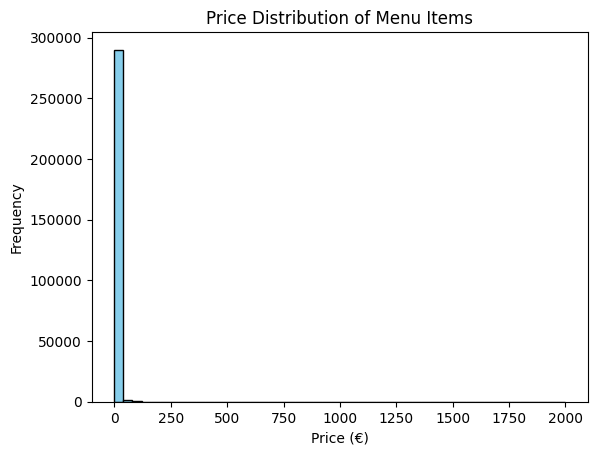

In [28]:
import matplotlib.pyplot as plt

# Create a histogram of prices
plt.hist(price_list, bins=50, color='skyblue', edgecolor='black')
plt.title('Price Distribution of Menu Items')
plt.xlabel('Price (€)')
plt.ylabel('Frequency')
plt.show()


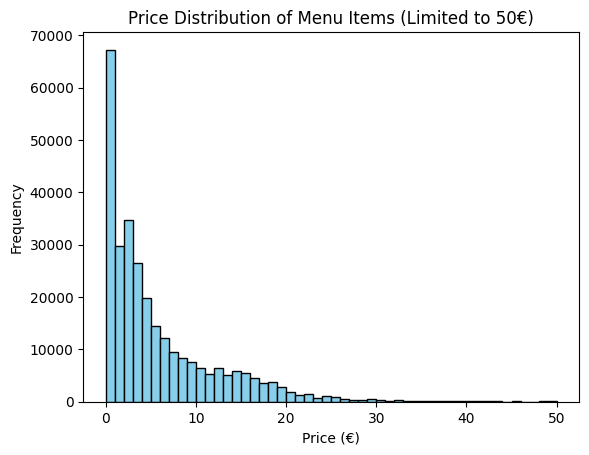

In [29]:
# Create a histogram with limited range
plt.hist([price for price in price_list if price <= 50], bins=50, color='skyblue', edgecolor='black')
plt.title('Price Distribution of Menu Items (Limited to 50€)')
plt.xlabel('Price (€)')
plt.ylabel('Frequency')
plt.show()


Дослідити аномально високі ціни:  >250€:

In [32]:
high_price_items = [price for price in price_list if price > 250]
print(f"Number of items with prices >250€: {len(high_price_items)}")


Number of items with prices >250€: 7


Побудувати "ящик з вусами" для виявлення аномалій: Це допоможе виявити викиди в даних.

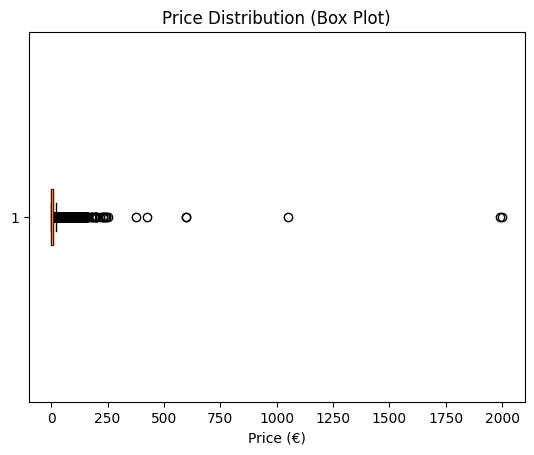

In [33]:
plt.boxplot(price_list, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Price Distribution (Box Plot)')
plt.xlabel('Price (€)')
plt.show()


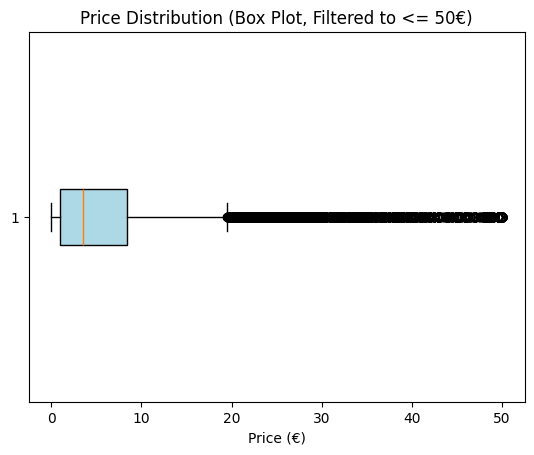

In [34]:
# Filter prices to exclude outliers
filtered_prices = [price for price in price_list if price <= 50]

# Create a box plot for filtered prices
plt.boxplot(filtered_prices, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Price Distribution (Box Plot, Filtered to <= 50€)')
plt.xlabel('Price (€)')
plt.show()


In [36]:
# Count and display high-price anomalies
high_price_items = [price for price in price_list if price > 250]
print(f"Number of items with prices >250€: {len(high_price_items)}")

# Query to get top 10 highest-priced items
query_high_prices = """
SELECT name, price
FROM menu_items
WHERE CAST(price AS REAL) > 250
ORDER BY price DESC
LIMIT 10;
"""

# Execute the query
with sqlite3.connect(db_path) as connection:
    cursor = connection.cursor()
    cursor.execute(query_high_prices)
    high_price_items = cursor.fetchall()

# Print results
print("Top 10 Highest-Priced Items:")
for item in high_price_items:
    print(f"Name: {item[0]}, Price: {item[1]}")


Number of items with prices >250€: 7
Top 10 Highest-Priced Items:
Name: Vegetable Samosa, Price: 600.0
Name: Onion Bhajee, Price: 600.0
Name: Pauillac, Cru Classé, Château Pichon Longueville, 2005, Price: 425.0
Name: Miraval, Price: 375.0
Name: Lamsbrochette Iskender, Price: 2000.0
Name: 19 Som Tam Thai, Price: 1990.0
Name: Soepvlees zonder been, Price: 1049.0


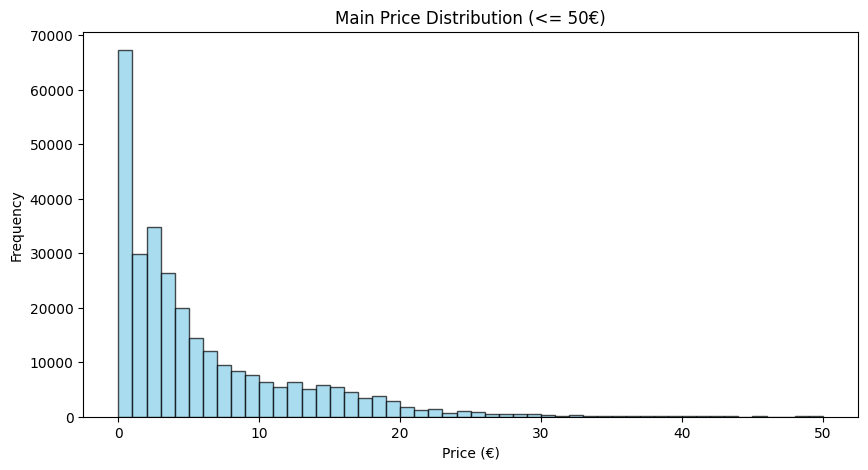

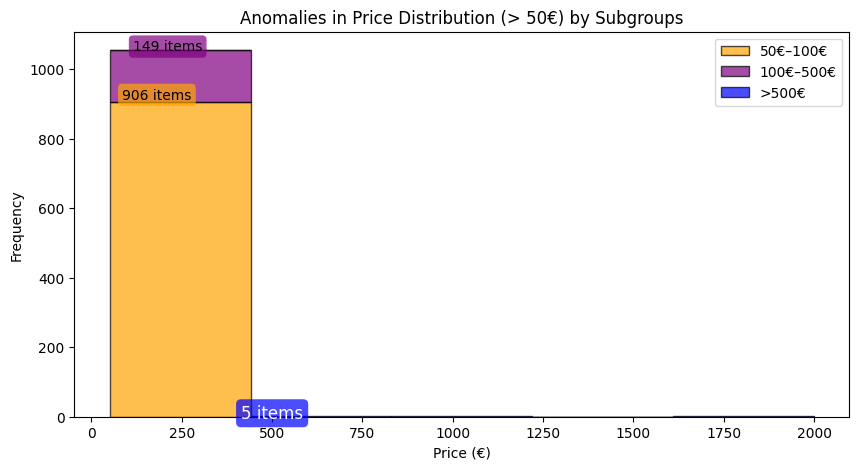

In [94]:
import matplotlib.pyplot as plt

# Plot for main price distribution
plt.figure(figsize=(10, 5))
plt.hist(filtered_prices, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Main Price Distribution (<= 50€)')
plt.xlabel('Price (€)')
plt.ylabel('Frequency')
plt.show()

# Plot for anomalies (prices > 50€)
# Calculate the size of each subgroup
subgroup_sizes = [len(subgroup_1), len(subgroup_2), len(subgroup_3)]

# Plot each subgroup
plt.figure(figsize=(10, 5))
bars = plt.hist(
    [subgroup_1, subgroup_2, subgroup_3],
    bins=5,
    stacked=True,
    color=['orange', 'purple', 'blue'],
    edgecolor='black',
    alpha=0.7,
    label=['50€–100€', '100€–500€', '>500€']
)

# Add text annotations for subgroup sizes with specific offsets
offsets = [20, 10, -10]  # Adjust offsets for each group
for i, (rects, size, color) in enumerate(zip(bars[0], subgroup_sizes, ['orange', 'purple', 'blue'])):
    if size == 5:  # Special case for "5 items"
        plt.text(
            500,  # X-coordinate: shifted to the right
            10,  # Y-coordinate: near the bottom
            "5 items",
            ha='center',
            va='center',
            color='white',
            fontsize=12,
            bbox=dict(facecolor='blue', edgecolor='none', boxstyle='round,pad=0.3', alpha=0.7)
        )
    else:  # Other subgroups
        y_position = rects.sum() + offsets[i]
        plt.text(
            rects.mean(),  # Horizontal position: center of the bar
            y_position,  # Vertical position with offset
            f"{size} items",
            ha='center',
            va='center',
            color='black',
            fontsize=10,
            bbox=dict(facecolor=color, edgecolor='none', boxstyle='round,pad=0.3', alpha=0.7)
        )

plt.title('Anomalies in Price Distribution (> 50€) by Subgroups')
plt.xlabel('Price (€)')
plt.ylabel('Frequency')
plt.legend()
plt.show()



Available tables in Takeaway DB: [('sqlite_sequence',), ('locations',), ('restaurants',), ('locations_to_restaurants',), ('menuItems',), ('categories',), ('categories_restaurants',)]
Menu Items Table Structure: [(0, 'primarySlug', '', 0, None, 1), (1, 'id', '', 0, None, 2), (2, 'name', 'TEXT', 0, None, 0), (3, 'description', 'TEXT', 0, None, 0), (4, 'price', '', 0, None, 0), (5, 'alcoholContent', '', 0, None, 0), (6, 'caffeineContent', '', 0, None, 0)]


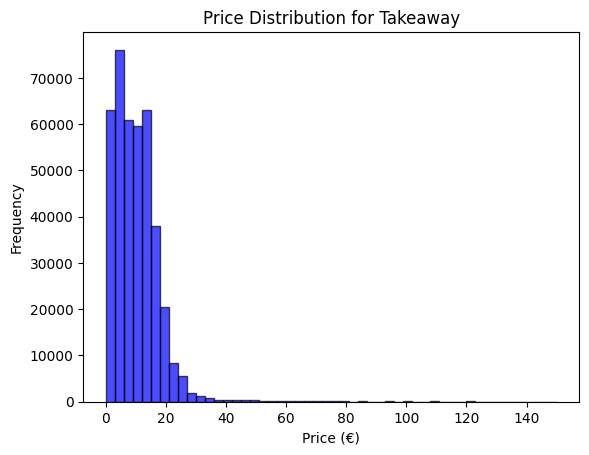

Top 10 highest-priced items: [('Okra titanic (145 stuks)', 150.0), ('Titanic boot deluxe (105st 4-5p)', 150.0), ('Star Titanic boat (100 stuks)', 150.0), ('Titanic boot voor 6 personen', 150.0), ('Miraval - côtes de Provence - rosé wine (3 l)', 150.0), ('Nom xoai', 150.0), ('Menu Beirut Plaza (4 personnes)', 150.0), ('Sushi boat (voor 6 personen)', 150.0), ('Titanic boat', 150.0), ('Broodje vegetarisch Hawaï', 150.0)]
Top 10 lowest-priced items: [('Fajitas met groenten en champignons', 0.0), ('Coca-cola zero', 0.0), ('Mojito', 0.0), ("Pâtes all'amatriciana", 0.0), ('2 pizzas + 1 junior marguarita gratuite', 0.0), ("3 large pizza's + 1 large pizza gratis", 0.0), ('Soupe iskembe (tripes)', 0.0), ('Aloo sag', 0.0), ('Avial', 0.0), ('Bij bestelling van meer dan 45€, 1 fles wijn gratis!', 0.0)]


In [69]:
import sqlite3
import matplotlib.pyplot as plt

# Connect to the Takeaway database
connection_takeaway = sqlite3.connect(r"..\databases\takeaway.db")
cursor_takeaway = connection_takeaway.cursor()

# Check available tables in the database
cursor_takeaway.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables_takeaway = cursor_takeaway.fetchall()
print("Available tables in Takeaway DB:", tables_takeaway)

# Check the structure of the 'menuItems' table
cursor_takeaway.execute("PRAGMA table_info(menuItems);")
menu_items_structure = cursor_takeaway.fetchall()
print("Menu Items Table Structure:", menu_items_structure)

# Query to fetch price distribution
query_price_distribution_takeaway = """
SELECT price
FROM menuItems;
"""
cursor_takeaway.execute(query_price_distribution_takeaway)

# Filter valid prices
prices_takeaway = [
    float(row[0])
    for row in cursor_takeaway.fetchall()
    if isinstance(row[0], (int, float)) or (isinstance(row[0], str) and row[0].replace('.', '', 1).isdigit())
]

# Plot the price distribution
plt.hist(prices_takeaway, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Price Distribution for Takeaway')
plt.xlabel('Price (€)')
plt.ylabel('Frequency')
plt.show()

# Query to find the top 10 highest-priced items
query_top_prices_takeaway = """
SELECT name, price
FROM menuItems
ORDER BY price DESC
LIMIT 10;
"""
cursor_takeaway.execute(query_top_prices_takeaway)
top_prices_takeaway = cursor_takeaway.fetchall()
print("Top 10 highest-priced items:", top_prices_takeaway)

# Query to find the top 10 lowest-priced items
query_low_prices_takeaway = """
SELECT name, price
FROM menuItems
ORDER BY price ASC
LIMIT 10;
"""
cursor_takeaway.execute(query_low_prices_takeaway)
low_prices_takeaway = cursor_takeaway.fetchall()
print("Top 10 lowest-priced items:", low_prices_takeaway)

# Close the connection to the database
connection_takeaway.close()



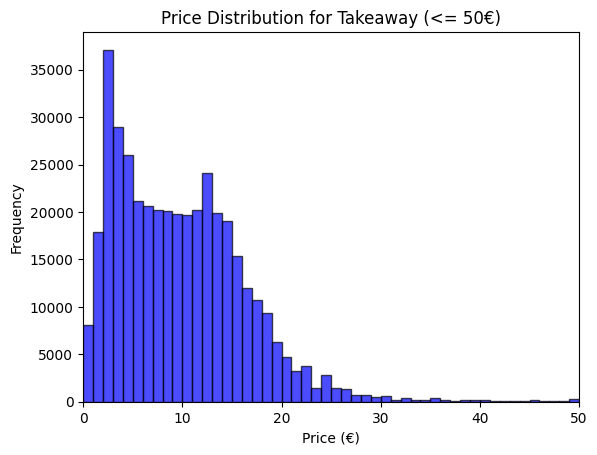

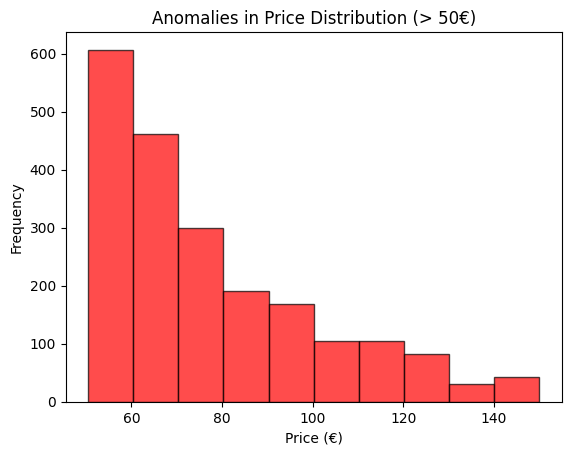

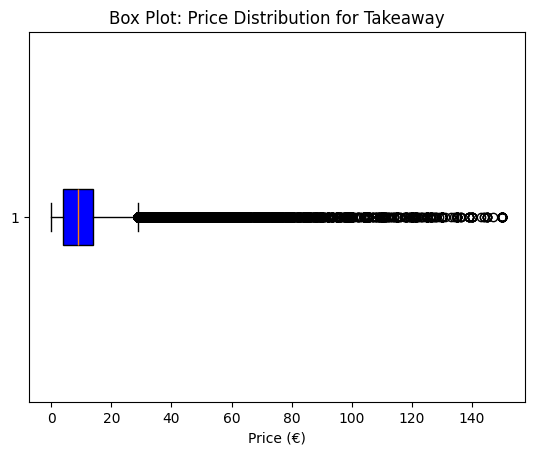

In [70]:
import numpy as np

# Main distribution (prices <= 50€)
filtered_prices = [price for price in prices_takeaway if price <= 50]
plt.hist(filtered_prices, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Price Distribution for Takeaway (<= 50€)')
plt.xlabel('Price (€)')
plt.ylabel('Frequency')
plt.xlim(0, 50)
plt.show()

# Highlight anomalies (prices > 50€)
high_price_items = [price for price in prices_takeaway if price > 50]
plt.hist(high_price_items, bins=10, color='red', edgecolor='black', alpha=0.7)
plt.title('Anomalies in Price Distribution (> 50€)')
plt.xlabel('Price (€)')
plt.ylabel('Frequency')
plt.show()

# Box plot for the entire price range
plt.boxplot(prices_takeaway, vert=False, patch_artist=True, boxprops=dict(facecolor='blue', color='black'))
plt.title('Box Plot: Price Distribution for Takeaway')
plt.xlabel('Price (€)')
plt.show()


In [71]:
import folium
import pandas as pd

# Example data (Replace with real data from your database)
data = pd.DataFrame({
    'latitude': [50.85045, 50.8372, 50.6374],
    'longitude': [4.34878, 4.3676, 4.6796],
    'avg_price': [12, 25, 40],  # Example average prices
    'restaurant_count': [50, 30, 20]  # Number of restaurants per location
})

# Create a base map
price_map = folium.Map(location=[50.85045, 4.34878], zoom_start=8)

# Add price data as circle markers
for _, row in data.iterrows():
    color = 'green' if row['avg_price'] <= 15 else 'orange' if row['avg_price'] <= 30 else 'red'
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['restaurant_count'] / 5,  # Size proportional to restaurant count
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        tooltip=f"Avg Price: €{row['avg_price']}, Restaurants: {row['restaurant_count']}"
    ).add_to(price_map)

# Save the map to an HTML file
price_map.save('price_distribution_map.html')
print("Map saved as 'price_distribution_map.html'")


Map saved as 'price_distribution_map.html'
